In [8]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *

In [3]:
mass = 6E05
T_n  = 0.60
wn   = 2*pi/T_n
k    = mass*wn**2
zeta = 0.02
wd   = wn * sqrt(1.00-zeta**2)
damp = 2*zeta*mass*wn

In [4]:
def p(t):
    if t < 1.00 : return 4E5 * t
    if t < 3.00 : return 2E5 * (3-t)
    return 0.00

In [5]:
h = 0.025
cz = cos(wd*h)*exp(-zeta*wn*h)
sz = sin(wd*h)*exp(-zeta*wn*h)
              
x_ = [] ; v_ = [] ; t_ = []

t = 0.00 ; X = 0.00 ; V = 0.00 ; P = p(t)

In [6]:
while t < 6.00:
    x_.append(X) ; v_.append(V) ; t_.append(t)
    # print "%6.3f   %+12.10f %+12.10f" % (t, X, V)
    t = t+h
    Ph = p(t)
    dx = P/k
    ddx = (Ph-P)/k
    B = X + 2*zeta*ddx/wn/h - dx
    A = (V + zeta*wn*B - ddx/h)/wd
    X = A*sz + B*cz + dx + ddx*(1-2*zeta/wn/h)
    V = (A*(wd*cz-zeta*wn*sz) - B*(wd*sz+zeta*wn*cz) + ddx/h)
    P = Ph

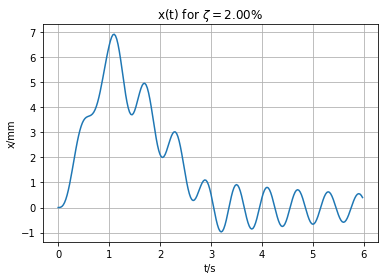

In [11]:
plot(t_, [x*1000 for x in x_])
grid()
xlabel('t/s')
ylabel('x/mm')
title('x(t) for $\zeta=%.2f$%%'%(100*zeta))
None